#### FEATURES	
    
    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
- Datasets are linearly separable.
- Number of instances: 569
- Class distribution: 212 Malignant, 357 Benign
- Target Class: 
    - Malignant
    - Benign

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
from sklearn.datasets import load_breast_cancer

In [105]:
cancer = load_breast_cancer()

In [106]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [107]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [108]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [109]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [110]:
print(cancer['target_names'])

['malignant' 'benign']


In [111]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [112]:
cancer['target'].shape

(569,)

In [113]:
cancer['data'].shape

(569, 30)

In [114]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

In [115]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [116]:
dataset = { 'data'   : np.array([['kol','M', 120],
                                 ['fin', 'M', 150],
                                 ['rebecca', 'F', 130],
                                 ['klaus', 'M', 140]]),
           'trait'   :np.array(['bad', 'bad','good', 'bad']),
           'features': np.array(['name', 'sex', 'age'])
    
}



In [117]:
df_test2 = pd.DataFrame(  np.c_[ dataset['data'], dataset['trait'] ], columns =np.append(dataset['features'],['trait'] )  )

In [118]:
df_test2

,name,sex,age,trait
0,kol,M,120,bad
1,fin,M,150,bad
2,rebecca,F,130,good
3,klaus,M,140,bad


In [119]:
df_test2.corr()

""


In [120]:
data = {'X': list(np.arange(0,10,1)), 'Y': [1,3,2,5,7,8,8,9,10,12]}
df = pd.DataFrame(data) 
df2 = pd.DataFrame(np.ones(10), columns = ['ones'])
df_new = pd.concat([df2,df], axis = 1)

In [121]:
df_new-10

,ones,X,Y
0,-9.0,-10,-9
1,-9.0,-9,-7
2,-9.0,-8,-8
3,-9.0,-7,-5
4,-9.0,-6,-3
5,-9.0,-5,-2
6,-9.0,-4,-2
7,-9.0,-3,-1
8,-9.0,-2,0
9,-9.0,-1,2


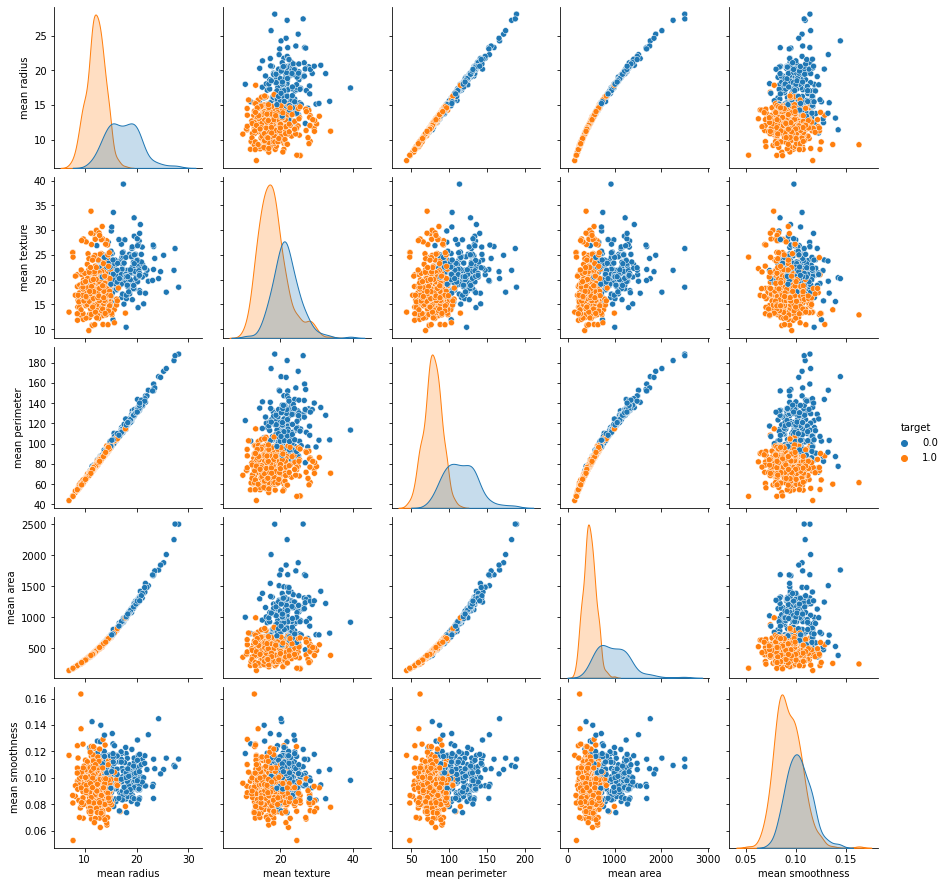

In [122]:
sns.pairplot(df_cancer, hue = 'target' ,vars = ['mean radius','mean texture' , 'mean perimeter' ,'mean area','mean smoothness' ] )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

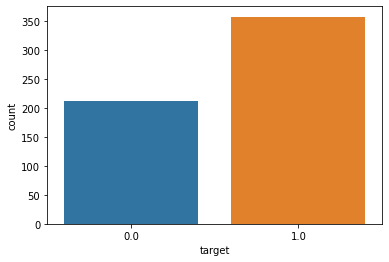

In [123]:
sns.countplot(df_cancer['target'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

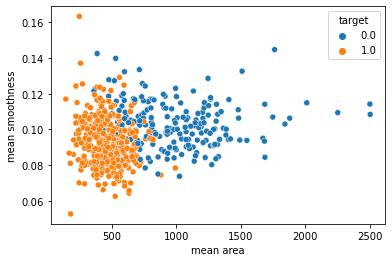

In [124]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)

<AxesSubplot:>

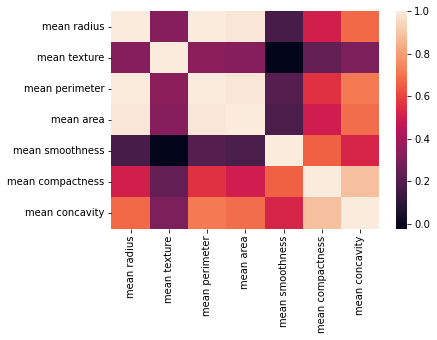

In [125]:
sns.heatmap (df_cancer.iloc[:,0:7].corr())

In [126]:
df_cancer.corr().tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
worst concavity,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,0.433721,0.346234,...,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,-0.659610
worst concave points,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,...,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,-0.793566
worst symmetry,0.163953,0.105008,0.189115,0.143570,0.394309,0.510223,0.409464,0.375744,0.699826,0.334019,...,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,-0.416294
worst fractal dimension,0.007066,0.119205,0.051019,0.003738,0.499316,0.687382,0.514930,0.368661,0.438413,0.767297,...,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,-0.323872
target,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872,1.000000


<AxesSubplot:>

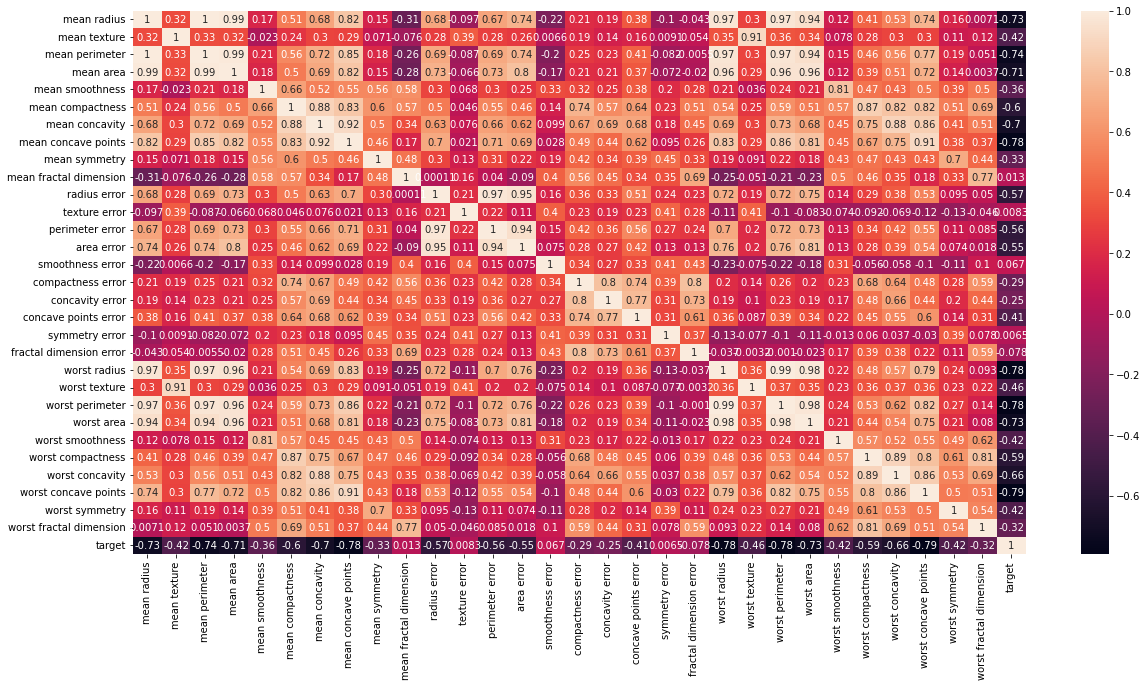

In [127]:
plt.figure(figsize = (20,10))
sns.heatmap (df_cancer.corr(), annot = True)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X = df_cancer.drop('target', axis = 1) 

In [130]:
y = df_cancer['target'] 

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [132]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.73560,0.20340,0.3274,0.12520


In [133]:
y_train

306    1.0
410    1.0
197    0.0
376    1.0
244    0.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 455, dtype: float64

In [134]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.61100,0.63350,0.20240,0.4027,0.09876
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.17880,0.25600,0.12210,0.2889,0.08006
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658
549,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300


In [135]:
y_test

28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
      ... 
414    0.0
515    1.0
186    0.0
3      0.0
261    0.0
Name: target, Length: 114, dtype: float64

## Train Model

In [136]:
from sklearn.svm import SVC

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
svc_model = SVC()

In [139]:
svc_model.fit(X_train, y_train)

SVC()

# Evaluate Model

In [140]:
y_predict = svc_model.predict(X_test)

In [141]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [142]:
y_test.values

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [143]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

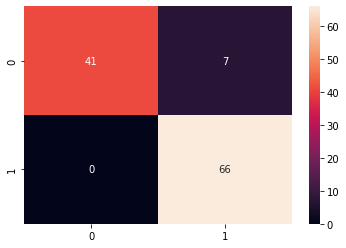

In [144]:
sns.heatmap(cm, annot=True)

# Data Normalization

$$ X^{\prime} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

In [145]:
min_xtrain = X_train.min()

In [146]:
range_train = (X_train-min_xtrain).max()

In [147]:
X_train_scaled = (X_train - min_xtrain )/range_train

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

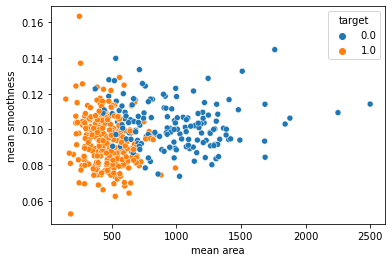

In [148]:
sns.scatterplot(x = X_train['mean area'] , y =X_train['mean smoothness'], hue = y_train )

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

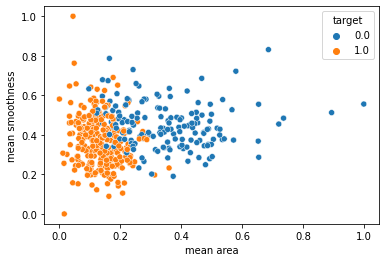

In [149]:
sns.scatterplot(x = X_train_scaled['mean area'] , y =X_train_scaled['mean smoothness'], hue = y_train )

In [150]:
X_test_scaled = (X_test - X_test.min())/((X_test-X_test.min()).max())

In [151]:
y_test_scaled = (y_test - y_test.min())/((y_test-y_test.min()).max())

In [152]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [153]:
y_predict = svc_model.predict(X_test_scaled)

In [154]:
cm = confusion_matrix(y_test, y_predict)

In [155]:
cm

array([[44,  4],
       [ 0, 66]], dtype=int64)

<AxesSubplot:>

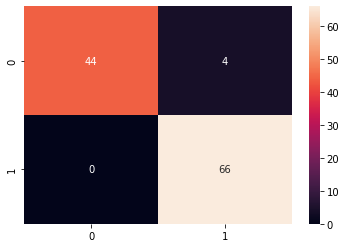

In [156]:
sns.heatmap(cm, annot=True)

In [157]:
print( classification_report(y_test, y_predict) )

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy = TP+TN/TP+FP+FN+TN

Precision = TP/TP+FP

Recall(sensitivity) = TP/TP+FN

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [158]:
param_grid = {'C': [0.1,1,10,100],
             'gamma':[1, 0.1,0.01, 0.001],
             'kernel':['rbf']}

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4) 

In [161]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [162]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [163]:
grid_predictions = grid.predict(X_test_scaled)

In [165]:
cm = confusion_matrix(y_test, grid_predictions)

<AxesSubplot:>

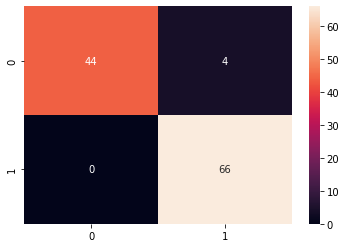

In [166]:
sns.heatmap(cm, annot = True)